## Part 1: ISOMAP
Implement Isomap Visualization  

In [2]:
from sklearn.neighbors    import kneighbors_graph
from sklearn.manifold     import MDS
from scipy.sparse.csgraph import csgraph_to_dense
from scipy.sparse.csgraph import floyd_warshall


"""Args:
X: input samples, array (num, dim)
n_components: dimension of output data
n_neighbours: neighborhood size

Returns:
Y: output samples, array (num, n_components)
"""
def Isomap(X, n_components=2, n_neighbours=10):
    NN = kneighbors_graph(X, n_neighbours, mode='distance')  # nearest neighbour matrix
    SP = floyd_warshall(NN, directed=False)                  # shortest path matrix (geodesic)
    EM = MDS(n_components, dissimilarity='precomputed')      # embedding
    Y  = EM.fit_transform(SP)
    return Y

## Part 2: Manifold Visualization
Visualize the S-shaped 3-d dataset using the Isomap.

In [3]:
from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using Isomap

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

<IPython.core.display.Javascript object>


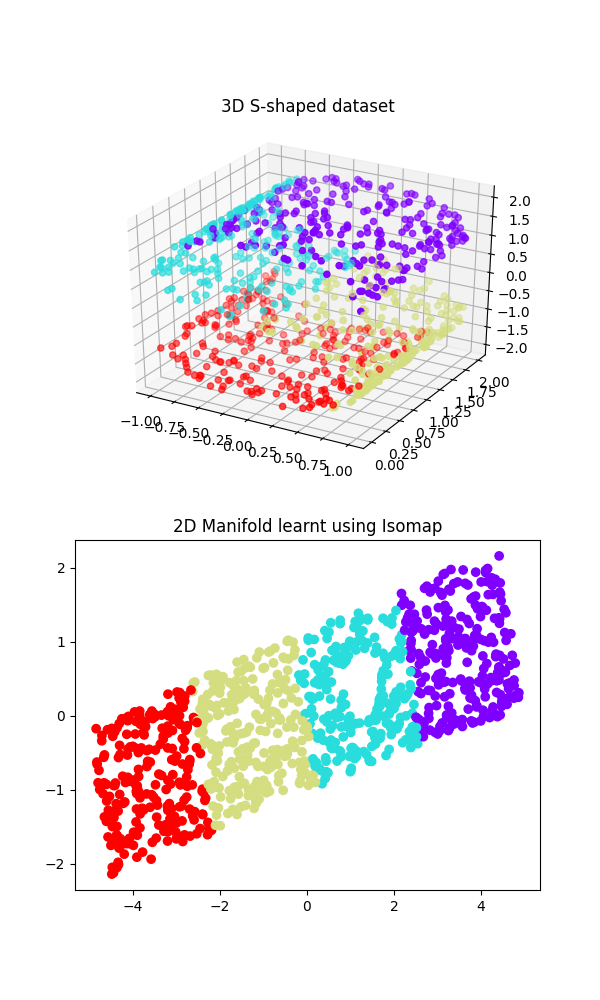

In [5]:
#  Visualization code here
from matplotlib import pyplot as plt
%matplotlib notebook

IX = ISOMAP(SX, 10)

fig = plt.figure(figsize=(6, 10))
axi = fig.add_subplot(211, projection='3d')
colorize = dict(c=St, cmap=plt.cm.get_cmap('rainbow', 4))
axi.scatter3D(SX[:, 0], SX[:, 1], SX[:, 2], **colorize)
axi.title.set_text('3D S-shaped dataset')

axi = fig.add_subplot(212)
axi.scatter([IX[:, 0]], [IX[:, 1]], **colorize)
axi.title.set_text('2D Manifold learnt using Isomap')


## Part 3: Visualizing high-dimensional data
Visualize the Swiss roll dataset using Isomap.

In [7]:
# Swiss roll dataset loading here
import numpy

d = []
with open('./swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

(1600, 3)


The code in the next cell should draw a single plot with the following subplots:

1. Visualize Swiss roll.
2. Unwrap the manifold in 2D and visualize using Isomap.

<IPython.core.display.Javascript object>


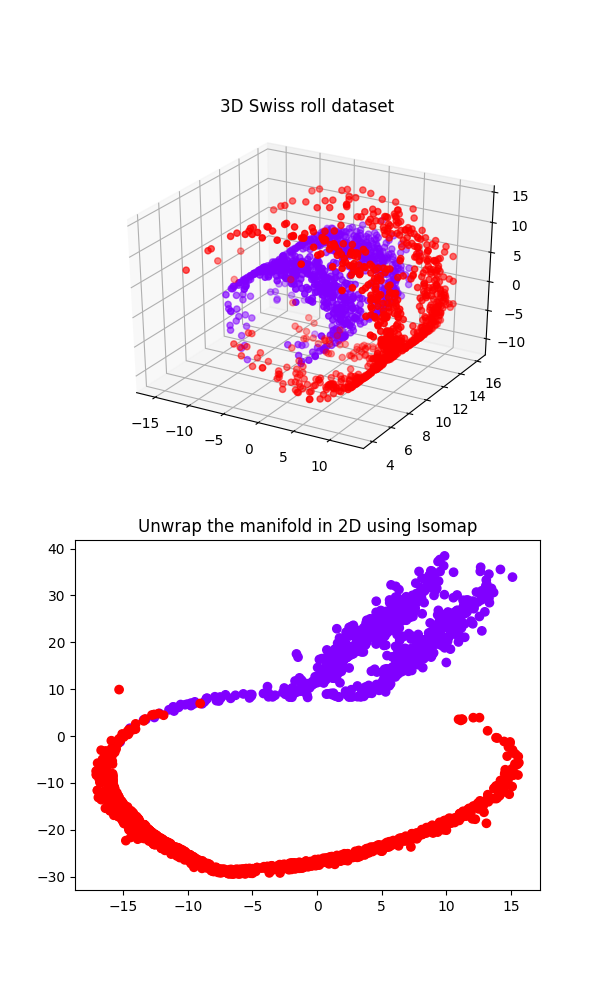

In [10]:
import numpy    as np
from matplotlib import pyplot as plt
%matplotlib notebook

X  = swissroll
Xc = np.linspace(0, 1, X.shape[0])
IX = Isomap(X, 2)

fig = plt.figure(figsize=(6, 10))
axi = fig.add_subplot(211, projection='3d')
colorize = dict(c=Xc, cmap=plt.cm.get_cmap('rainbow', 2))
axi.scatter3D(X[:, 0], X[:, 1], X[:, 2], **colorize)
axi.title.set_text('3D Swiss roll dataset')

axi = fig.add_subplot(212)
axi.scatter(IX[:, 0], IX[:, 1], **colorize)
axi.title.set_text('Unwrap the manifold in 2D using Isomap')